# 地理/逆地理编码

In [1]:
key ='d273cff7b654dc514b8145ea5a7458f5'
import requests

## ①地理编码

In [2]:
def gaode(address,city=None,batch='false',sig=None):
    # 获取地理编码
    params={
        'key':key,
        'address':address,
        'city':city,
        'out':'json'
    }
    url='https://restapi.amap.com/v3/geocode/geo?parameters'
    reponse = requests.get(url,params=params)
    data = reponse.json()
    return data

In [3]:
广州塔=gaode('广东省广州市海珠区新港中艺苑路广州塔')
广州塔

{'status': '1',
 'info': 'OK',
 'infocode': '10000',
 'count': '1',
 'geocodes': [{'formatted_address': '广东省广州市海珠区广州塔',
   'country': '中国',
   'province': '广东省',
   'citycode': '020',
   'city': '广州市',
   'district': '海珠区',
   'township': [],
   'neighborhood': {'name': [], 'type': []},
   'building': {'name': [], 'type': []},
   'adcode': '440105',
   'street': [],
   'number': [],
   'location': '113.318862,23.106985',
   'level': '兴趣点'}]}

In [4]:
广州塔_location=广州塔['geocodes'][0]['location']
广州塔_location

'113.318862,23.106985'

## ②逆地理编码

In [5]:
def running(location,poitype=None,radius='1000',extensions='base'):
    #逆地理编码
    params ={
        'key':key,
        'location':location,
    }
    url = 'https://restapi.amap.com/v3/geocode/regeo?parameters'
    response=requests.get(url,params=params)
    data = response.json()
    return data

In [6]:
广州塔=running(广州塔_location)
广州塔

{'status': '1',
 'regeocode': {'addressComponent': {'city': '广州市',
   'province': '广东省',
   'adcode': '440105',
   'district': '海珠区',
   'towncode': '440105001000',
   'streetNumber': {'number': '4号',
    'location': '113.318076,23.1060711',
    'direction': '西南',
    'distance': '129.567',
    'street': '江丽路'},
   'country': '中国',
   'township': '赤岗街道',
   'businessAreas': [{'location': '113.327958,23.091721',
     'name': '赤岗',
     'id': '440105'},
    {'location': '113.31655,23.094556', 'name': '新港', 'id': '440105'},
    {'location': '113.285135,23.104306', 'name': '滨江', 'id': '440105'}],
   'building': {'name': [], 'type': []},
   'neighborhood': {'name': [], 'type': []},
   'citycode': '020'},
  'formatted_address': '广东省广州市海珠区赤岗街道广州塔码头(轮渡站)'},
 'info': 'OK',
 'infocode': '10000'}

### 思考---地理/逆地理编码
#### 用户可以任意搜索一个地名，计算机系统可以精准得出其地理坐标，封装成API进行调用

# 路径规划

## ①步行路径规划

In [7]:
def walking(origin,destination,sig=None):
    #获取步行导航
    url = 'https://restapi.amap.com/v3/direction/walking?parameters'
    params={
        'key':key,
        'origin':origin,
        'destination':destination,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data

In [8]:
中大南方=gaode('广东省广州市从化区温泉镇中山大学南方学院')
中大南方_location = 中大南方['geocodes'][0]['location']
print(中大南方_location)
print(广州塔_location)
南方_广州塔=walking(中大南方_location,广州塔_location)
南方_广州塔

113.679287,23.632575
113.318862,23.106985


{'status': '1',
 'info': 'ok',
 'infocode': '10000',
 'count': '1',
 'route': {'origin': '113.679287,23.632575',
  'destination': '113.318862,23.106985',
  'paths': [{'distance': '79404',
    'duration': '63523',
    'steps': [{'instruction': '向南步行161米右转',
      'orientation': '南',
      'road': [],
      'distance': '161',
      'duration': '129',
      'polyline': '113.679592,23.632088;113.679609,23.631003;113.679609,23.631003;113.679609,23.630877;113.67964,23.630638',
      'action': '右转',
      'assistant_action': [],
      'walk_type': '0'},
     {'instruction': '向西步行99米左转',
      'orientation': '西',
      'road': [],
      'distance': '99',
      'duration': '79',
      'polyline': '113.67964,23.630634;113.679362,23.630521;113.679201,23.630473;113.679201,23.630473;113.679032,23.63043;113.679032,23.63043;113.67888,23.630404;113.67888,23.630404;113.678711,23.630365',
      'action': '左转',
      'assistant_action': [],
      'walk_type': '0'},
     {'instruction': '向南步行237米左转',
    

## ②公交路径规划

In [9]:
def bus(origin,destination,city,cityd=None,strategy=None,nightflag=None,date=None,time=None):
    #公交车导航
    url='https://restapi.amap.com/v3/direction/transit/integrated?parameters'
    params ={
        'key':key,
        'origin':origin,
        'destination':destination,
        'city':city,
        'cityd':cityd,
        'output':'json'
    }
    response  =requests.get(url,params=params)
    data= response.json()
    return data

In [10]:
bus_南方_广州塔=bus(中大南方_location,广州塔_location,'广州')
bus_南方_广州塔

{'status': '1',
 'info': 'OK',
 'infocode': '10000',
 'count': '5',
 'route': {'origin': '113.679287,23.632575',
  'destination': '113.318862,23.106985',
  'distance': '86961',
  'taxi_cost': '297.1479',
  'transits': [{'cost': '16.0',
    'duration': '9316',
    'nightflag': '0',
    'walking_distance': '1533',
    'distance': '88569',
    'missed': '0',
    'segments': [{'taxi': [],
      'walking': {'origin': '113.679016,23.632349',
       'destination': '113.676613,23.631285',
       'distance': '513',
       'duration': '439',
       'steps': [{'instruction': '步行57米右转',
         'road': [],
         'distance': '57',
         'duration': [],
         'polyline': '113.679016,23.632349;113.678528,23.632097',
         'action': '右转',
         'assistant_action': []},
        {'instruction': '步行47米向左前方行走',
         'road': [],
         'distance': '47',
         'duration': [],
         'polyline': '113.678528,23.632092;113.678398,23.632166;113.678101,23.632261',
         'action': '向

## ③驾车路径规划

In [11]:
import requests
def car(origin,destination,origind=None,destinationid=None,origintype=None,destinationtype=None,strategy='0'):
    # 驾车导航
    url='https://restapi.amap.com/v3/direction/driving?parameters'
    params= {
        'key':key,
        'origin':origin,
        'destination':destination,
        'output':'json'      
    }
    response = requests.get(url,params=params)
    data= response.json()
    return data

In [12]:
car_南方_广州塔=car(中大南方_location,广州塔_location)
car_南方_广州塔

{'status': '1',
 'info': 'OK',
 'infocode': '10000',
 'count': '1',
 'route': {'origin': '113.679287,23.632575',
  'destination': '113.318862,23.106985',
  'taxi_cost': '291',
  'paths': [{'distance': '85393',
    'duration': '5249',
    'strategy': '速度最快',
    'tolls': '0',
    'toll_distance': '0',
    'steps': [{'instruction': '向北行驶122米向左前方行驶',
      'orientation': '北',
      'distance': '122',
      'tolls': '0',
      'toll_distance': '0',
      'toll_road': [],
      'duration': '50',
      'polyline': '113.679604,23.632574;113.679604,23.632856;113.679588,23.633173;113.679604,23.633251;113.679626,23.633652;113.679642,23.633688',
      'action': '向左前方行驶',
      'assistant_action': [],
      'tmcs': [{'lcode': [],
        'distance': '31',
        'status': '未知',
        'polyline': '113.679604,23.632574;113.679604,23.632856'},
       {'lcode': [],
        'distance': '34',
        'status': '未知',
        'polyline': '113.679604,23.632856;113.679588,23.633173'},
       {'lcode': []

## ④骑车路径规划

In [13]:
def bicycle(origin,destination):
    #自行车导航
    url='https://restapi.amap.com/v4/direction/bicycling?parameters'
    params= {
        'key':key,
        'origin':origin,
        'destination':destination,
        'output':'json'      
    }
    response = requests.get(url,params=params)
    data= response.json()
    return data

In [14]:
bike_南方_广州塔=bicycle(中大南方_location,广州塔_location)
bike_南方_广州塔

{'data': {'destination': '113.318862,23.106985',
  'origin': '113.679287,23.632575',
  'paths': [{'distance': 81287,
    'duration': 19509,
    'steps': [{'action': '右转',
      'assistant_action': '',
      'distance': 161,
      'duration': 39,
      'instruction': '向南骑行161米右转',
      'orientation': '南',
      'polyline': '113.679592,23.632088;113.679609,23.631003;113.679609,23.631003;113.679609,23.630877;113.67964,23.630638',
      'road': '',
      'walk_type': 0},
     {'action': '左转',
      'assistant_action': '',
      'distance': 99,
      'duration': 24,
      'instruction': '向西骑行99米左转',
      'orientation': '西',
      'polyline': '113.67964,23.630634;113.679362,23.630521;113.679201,23.630473;113.679201,23.630473;113.679032,23.63043;113.679032,23.63043;113.67888,23.630404;113.67888,23.630404;113.678711,23.630365',
      'road': '',
      'walk_type': 0},
     {'action': '左转',
      'assistant_action': '',
      'distance': 237,
      'duration': 57,
      'instruction': '向南骑行23

## ⑤货车路径规划

In [15]:
def truck(origin,destination,size,originid=None,destinationid=None,origintype=None,destinationtype=None,strategy='1'):
    #货车导航
    url='https://restapi.amap.com/v4/direction/truck?parameters'
    params = {
        'key':key,
        'origin':origin,
        'destination':destination,
        'size':size,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data= response.json()
    return data

In [16]:
truck__南方_广州塔=truck(中大南方_location,广州塔_location,1)
truck__南方_广州塔

{'data': {'route': {'destination': '113.318862,23.106985',
   'origin': '113.679287,23.632575',
   'paths': [{'distance': 88498,
     'duration': 5689,
     'restriction': 0,
     'steps': [{'action': '向左前方行驶',
       'assistant_action': '',
       'cities': [{'adcode': '440117',
         'citycode': None,
         'districts': [],
         'name': None},
        {'adcode': '440117', 'citycode': None, 'districts': [], 'name': None},
        {'adcode': '440117', 'citycode': None, 'districts': [], 'name': None},
        {'adcode': '440117', 'citycode': None, 'districts': [], 'name': None}],
       'distance': 122,
       'duration': 50,
       'instruction': '向北行驶122米向左前方行驶',
       'orientation': '北',
       'polyline': '113.679596,23.632574;113.679596,23.632856;113.679592,23.633173;113.679596,23.633251;113.679627,23.63365;113.679648,23.633689',
       'road': None,
       'tmcs': [{'distance': 31,
         'polyline': '113.679596,23.632574;113.679596,23.632856',
         'status': '未知'

## ⑥距离测量

In [124]:
def distance(origin,destination):
    # 两点之间的据里测量
    url='https://restapi.amap.com/v3/distance?parameters'
    params= {
        'key':key,
        'origin':origin,
        'destination':destination,
        'type':"1",
        'output':'json'      
    }
    response = requests.get(url,params=params)
    data= response.json()
    return data

### 思考---路径规划
#### 通过高清拍照传输建筑物的图片到计算机，计算机通过计算机视觉系统分析图中的道路拥堵状况，并规划最佳路线。可以再通过语音识别，说出具体的行驶路径与方向，再将这些规划路线的信息与语音识别封装成可以调用的api。

# 行政区域查询

In [18]:
def district(keywords,subdistrict=None,page=None,offset=None,extensions='base',filter=None,)->dict:
    url = 'https://restapi.amap.com/v3/config/district?parameters'
    params={
        'key':key,
        'keywords':keywords,
        'subdistrict':subdistrict,
        'page':page,
        'offset':offset,
        'extensions':extensions,
        'filter':filter,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data

In [19]:
广州市=district('广州市')
广州市

{'status': '1',
 'info': 'OK',
 'infocode': '10000',
 'count': '1',
 'suggestion': {'keywords': [], 'cities': []},
 'districts': [{'citycode': '020',
   'adcode': '440100',
   'name': '广州市',
   'center': '113.280637,23.125178',
   'level': 'city',
   'districts': [{'citycode': '020',
     'adcode': '440117',
     'name': '从化区',
     'center': '113.587386,23.545283',
     'level': 'district',
     'districts': []},
    {'citycode': '020',
     'adcode': '440115',
     'name': '南沙区',
     'center': '113.53738,22.794531',
     'level': 'district',
     'districts': []},
    {'citycode': '020',
     'adcode': '440114',
     'name': '花都区',
     'center': '113.211184,23.39205',
     'level': 'district',
     'districts': []},
    {'citycode': '020',
     'adcode': '440113',
     'name': '番禺区',
     'center': '113.364619,22.938582',
     'level': 'district',
     'districts': []},
    {'citycode': '020',
     'adcode': '440103',
     'name': '荔湾区',
     'center': '113.243038,23.124943',
     

### 思考---行政区域查询
#### 拍摄高清图片，传输某一区域的行政图，再借助计算机系统识别该图中的地理信息，记录经纬度坐标，封装成API进行调用。

# 搜索POL

## 关键字搜索

In [20]:
def place_text(keywords,types,city=None,citylimit=None,children=None,page=None,extensions='base',sig=None)->dict:
    url = 'https://restapi.amap.com/v3/place/text?parameters'
    params={
        'key':key,
        'keywords':keywords,
        'types':types,
        'city':city,
        'citylimit':citylimit,
        'children':children,
        'page':page,
        'extensions':extensions,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data

In [21]:
广州高校=place_text('大学','高等院校',city="广州市")
广州高校

{'status': '1',
 'count': '304',
 'info': 'OK',
 'infocode': '10000',
 'suggestion': {'keywords': [], 'cities': []},
 'pois': [{'id': 'B00140458B',
   'parent': [],
   'childtype': [],
   'name': '广东工业大学(龙洞校区)',
   'type': '科教文化服务;学校;高等院校',
   'typecode': '141201',
   'biz_type': [],
   'address': '迎龙路161号',
   'location': '113.359713,23.19677',
   'tel': '020-87082921',
   'distance': [],
   'biz_ext': [],
   'pname': '广东省',
   'cityname': '广州市',
   'adname': '天河区',
   'importance': [],
   'shopid': [],
   'shopinfo': '0',
   'poiweight': [],
   'photos': []},
  {'id': 'B0FFFFQZDE',
   'parent': [],
   'childtype': [],
   'name': '广州医科大学越秀校区',
   'type': '科教文化服务;学校;高等院校',
   'typecode': '141201',
   'biz_type': [],
   'address': '东风西路195号',
   'location': '113.256131,23.134038',
   'tel': '020-81340278;020-81340448',
   'distance': [],
   'biz_ext': [],
   'pname': '广东省',
   'cityname': '广州市',
   'adname': '越秀区',
   'importance': [],
   'shopid': [],
   'shopinfo': '0',
   'poiweight'

## 周边搜索

In [22]:
 def place_around(location,keywords=None,types=None,city=None,redius=None,sortrule=None,offset=None,page=None,extensions='base',sig=None)->dict:
    url = 'https://restapi.amap.com/v3/place/around?parameters'
    params={
        'key':key,
        'keywords':keywords,
        'location':location,
        'types':types,
        'city':city,
        'redius':redius,
        'sortrule':sortrule,
        'offset':offset,
        'page':page,
        'extensions':extensions,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data


In [126]:
广州塔周边=place_around(广州塔_location)
广州塔周边

{'status': '1',
 'count': '882',
 'info': 'OK',
 'infocode': '10000',
 'suggestion': {'keywords': [], 'cities': []},
 'pois': [{'id': 'B0FFFZDVWF',
   'parent': [],
   'childtype': [],
   'name': '壹茶舍',
   'type': '餐饮服务;茶艺馆;茶艺馆',
   'typecode': '050600',
   'biz_type': 'diner',
   'address': '江丽东街89-1号',
   'location': '113.318606,23.105822',
   'tel': '020-84267033',
   'distance': '132',
   'biz_ext': [],
   'importance': [],
   'shopid': [],
   'shopinfo': '0',
   'poiweight': [],
   'photos': []},
  {'id': 'B0FFMAUMB5',
   'parent': [],
   'childtype': [],
   'name': '丽水庭园-接送点',
   'type': '生活服务;生活服务场所;生活服务场所',
   'typecode': '070000',
   'biz_type': [],
   'address': [],
   'location': '113.318290,23.105769',
   'tel': [],
   'distance': '147',
   'biz_ext': [],
   'importance': [],
   'shopid': [],
   'shopinfo': '0',
   'poiweight': [],
   'photos': []},
  {'id': 'B0FFL7C3LJ',
   'parent': [],
   'childtype': [],
   'name': '韩奢美妍',
   'type': '生活服务;生活服务场所;生活服务场所',
   'typecode':

### 思考---搜索POI
#### 使用推荐算法，根据用户输入的关键字，获取与关键字相关的信息，并通过机器学习（ML），以受欢迎度顺序排列，受欢迎度最高的为第一个，依次排列，最低的则为最后一个。

# IP地位

In [24]:
def ip_place(ip,sig=None):
    url='https://restapi.amap.com/v3/ip?parameters'
    params = {
        'key':key,
        'ip':ip,
        'sig':sig,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data

In [25]:
阿里云_ip=ip_place('121.89.220.30')
阿里云_ip

{'status': '1',
 'info': 'OK',
 'infocode': '10000',
 'province': '北京市',
 'city': '北京市',
 'adcode': '110000',
 'rectangle': '116.0119343,39.66127144;116.7829835,40.2164962'}

### 思考---IP定位
#### 通过服务器的IP地址，锁定到该服务器的地理位置。可查找其合法性，若存在违规，可通过智能查找采取一定 的措施。

# 批量请求接口

In [76]:
def more():
    url='https://restapi.amap.com/v3/batch?key=d273cff7b654dc514b8145ea5a7458f5'
    header={
                'Connection':'close',
                'Accept':'application/json,image/gif, image/jpeg, image/pjpeg, image/pjpeg, application/x-shockwave-flash, */*',
                'User-Agent':'Mozilla/4.0 (compatible; MSIE 8.0; Windows NT 5.1; Trident/4.0; .NET CLR 2.0.50727)',
                "Content-Type": "application/json; charset=UTF-8"
    }
    body={
            "ops": [
            {
                "url": "/v3/place/around?offset=10&page=1&key=d273cff7b654dc514b8145ea5a7458f5&location=116.50394379585519,39.278209477408794&output=json&radius=100000&types=080000"
            },
            {
                "url": "/v3/place/around?offset=10&page=1&key=d273cff7b654dc514b8145ea5a7458f5&location=118.50394379585519,39.278209477408794&output=json&radius=100000&types=080000"
            }
        ]
    }

    r=requests.post(url,json=body).json()

    return r

In [77]:
more()

[{'status': 200,
  'body': {'suggestion': {'keywords': {}, 'cities': {}},
   'info': 'OK',
   'status': '1',
   'count': '888',
   'pois': [{'typecode': '080000',
     'adname': '永清县',
     'biz_type': {},
     'id': 'B0FFKKSDDS',
     'pname': '河北省',
     'importance': {},
     'parent': {},
     'location': '116.511528,39.270463',
     'distance': '1082',
     'tel': {},
     'biz_ext': {'rating': {}, 'cost': {}},
     'shopid': {},
     'address': {},
     'poiweight': {},
     'cityname': '廊坊市',
     'photos': {},
     'type': '体育休闲服务;体育休闲服务场所;体育休闲服务场所',
     'shopinfo': '0',
     'name': '李庄子村兰阳草莓采摘园',
     'childtype': {}},
    {'typecode': '080501',
     'adname': '永清县',
     'biz_type': {},
     'id': 'B0FFJM772Z',
     'pname': '河北省',
     'importance': {},
     'parent': {},
     'location': '116.513958,39.270648',
     'distance': '1205',
     'tel': {},
     'biz_ext': {'rating': {}, 'cost': {}},
     'shopid': {},
     'address': '永清镇北辛溜附近',
     'poiweight': {},
     'cit

### 思考---批量请求接口
#### 批量接口通过用户传入合并后的请求，同时返回多个请求的顺序集合。

# 静态地图

In [26]:
from PIL import Image
from io import BytesIO
def staticmap(location,zoom,size=None,scale=1,markers=None,labels=None,paths=None,traffic=0,page=None,sig=None)->dict:
    url = 'https://restapi.amap.com/v3/staticmap?parameters'
    params={
        'key':key,
        'location':location,
        'zoom':zoom,
        'size':size,
        'scale':scale,
        'markers':markers,
        'labels':labels,
        'paths':paths,
        'traffic':traffic,
        'sig':sig,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = Image.open(BytesIO(response.content))
    return data

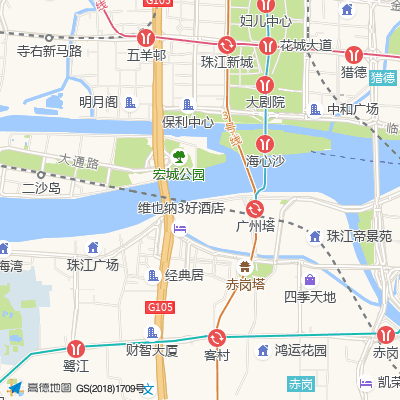

In [27]:
staticmap(location=广州塔_location,zoom=13)

### 思考---静态地图
#### 静态地图服务通过返回一张地图图片响应HTTP请求，使用户能够将高德地图以图片形式嵌入自己的网页中。用户可以指定请求的地图位置、图片大小、以及在地图上添加覆盖物，如标签、标注、折线、多边形。实现计算机视觉与地理位置的互相转换。

# 坐标转换

In [51]:
def convert(locations,coordsys='gps',sig=None):
    url = 'https://restapi.amap.com/v3/assistant/coordinate/convert?parameters'
    params={
        'key':key,
        'locations':locations,
        'coordsys':'gps',
        'sig':sig,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data   

In [54]:
convert(广州塔_location)

{'status': '1',
 'info': 'ok',
 'infocode': '10000',
 'locations': '113.32427435981,23.104375271268'}

### 思考---坐标转换
#### 能够将用户输入的非高德坐标（GPS坐标、mapbar坐标、baidu坐标）转换成高德坐标，以便进一步使用其高级的AI,ML功能。

# 天气查询

In [30]:
def weather(city,extensions=None):
    url='https://restapi.amap.com/v3/weather/weatherInfo?parameters'
    params={
        'key':key,
        'city':city,
        'extensions':extensions,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data   

In [31]:
广州市=weather('广州市')
广州市

{'status': '1',
 'count': '1',
 'info': 'OK',
 'infocode': '10000',
 'lives': [{'province': '广东',
   'city': '广州市',
   'adcode': '440100',
   'weather': '多云',
   'temperature': '28',
   'winddirection': '东南',
   'windpower': '≤3',
   'humidity': '75',
   'reporttime': '2020-04-21 15:52:31'}]}

### 思考---天气查询
#### 用户输入城市编码，计算机定位所在的城市，返回查询到的天气信息，并推荐用户在该天气下，可以进行的活动与项目，增加其活动量。

# 输入提示

In [32]:
def inputtip(keywords,type=None,location=None,city=None,citylimit="false",datatype="all"):
    url = 'https://restapi.amap.com/v3/assistant/inputtips?parameters'
    params ={
        'key':key,
        'keywords':keywords,
        'type':type,
        'location':location,
        'city':city,
        'citylimit':citylimit,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data

In [33]:
美食=inputtip('鱼香肉丝')
美食

{'status': '1',
 'count': '8',
 'info': 'OK',
 'infocode': '10000',
 'tips': [{'id': 'B0FFK7XCBD',
   'name': '鱼香肉丝',
   'district': '山西省晋城市城区',
   'adcode': '140502',
   'location': '112.875874,35.489765',
   'address': '凤台东街1992西100米',
   'typecode': '050100',
   'city': []},
  {'id': 'B0FFHG6CGF',
   'name': '鱼香肉丝酒楼',
   'district': '河北省唐山市曹妃甸区',
   'adcode': '130209',
   'location': '118.279371,39.400297',
   'address': '于唐线西50米',
   'typecode': '050100',
   'city': []},
  {'id': 'B0FFKM5QDK',
   'name': '鱼香肉丝',
   'district': '河北省唐山市丰南区',
   'adcode': '130207',
   'location': '118.098899,39.518611',
   'address': '汇丰大街112附近',
   'typecode': '050000',
   'city': []},
  {'id': 'B0FFHKCV20',
   'name': '鱼香肉丝',
   'district': '河北省唐山市丰南区',
   'adcode': '130207',
   'location': '118.137537,39.509123',
   'address': '胥涧线与董稻路交叉口东北50米',
   'typecode': '050000',
   'city': []},
  {'id': 'B0FFIP8M40',
   'name': '鱼香肉丝',
   'district': '浙江省金华市东阳市',
   'adcode': '330783',
   'location': '120.2

### 思考-输入提示
#### 提供根据用户输入的关键词查询返回建议列表,使用推荐算法，根据用户输入的关键字，获取与关键字相关的信息，并通过机器学习（ML），以受欢迎度顺序排列，受欢迎度最高的为第一个，依次排列，最低的则为最后一个。

# 交通态势

## ①矩形区域交通态势

In [112]:
def rectangle():
    url='https://restapi.amap.com/v3/traffic/status/rectangle?parameters'
    params={
        'key':key,
        'rectangle':'116.351147,39.966309;116.357134,39.968727',
        'level':'5',
        'output':'json',
        'extensions':"base"
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data

In [113]:
rectangle()

{'status': '1',
 'info': 'OK',
 'infocode': '10000',
 'trafficinfo': {'description': '京藏高速：马甸桥附近出京方向行驶缓慢。',
  'evaluation': {'expedite': '80.00%',
   'congested': '13.33%',
   'blocked': '6.67%',
   'unknown': '0.00%',
   'status': '2',
   'description': '轻度拥堵'}}}

## ②圆形区域交通态势

In [36]:
def circle(location,level="5",extensions="base",radius="1000"):
    url= 'https://restapi.amap.com/v3/traffic/status/circle?parameters'
    params={
        'key':key,
        'location':location,
        'level':level,
        'extensions':extensions,
        'radius':radius,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data

In [37]:
circle(广州塔_location)

{'status': '1',
 'info': 'OK',
 'infocode': '10000',
 'trafficinfo': {'description': '１１８省道：从汇太西路到东坑三横路行驶缓慢；华穗路：从花城大道到临江大道行驶缓慢；江月路：从临江大道到明月一路行驶缓慢。',
  'evaluation': {'expedite': '89.66%',
   'congested': '6.90%',
   'blocked': '0.00%',
   'unknown': '3.44%',
   'status': '2',
   'description': '轻度拥堵'}}}

## ③指定路线交通态势

In [38]:
def road(name,city,level=None,extensions="base"):
    url='https://restapi.amap.com/v3/traffic/status/road?parameters'
    params={
        'key':key,
        'city':city,
        'name':name,
        'level':level,
        'extensions':extensions,
        'output':'json'        
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data

In [39]:
road(name='天河路',city='广州市')

{'status': '1',
 'info': 'OK',
 'infocode': '10000',
 'trafficinfo': {'description': '天河路：地中海国际酒店附近自西向东严重拥堵，从地中海国际酒店到华晟大厦行驶缓慢。',
  'evaluation': {'expedite': '85.08%',
   'congested': '10.67%',
   'blocked': '4.24%',
   'unknown': '0.01%',
   'status': '2',
   'description': '基本畅通'}}}

### 思考---交通态势
#### 在这里可以运用推荐算法，根据用户输入的地理位置，预测到该地点的交通态势，通过大数据算法和推荐算法，选择一条最合理且合适的行驶路线。

# 地理围栏

## ①创建围栏

In [85]:
def create():
    url='https://restapi.amap.com/v4/geofence/meta?key=d273cff7b654dc514b8145ea5a7458f5'
    params={      
        "name": "广州塔",
        "center": "113.327958,23.091721",
        "radius": "1000",
        "enable": "true",
        "valid_time": "2020-05-19",
        "repeat": "Mon,Tues,Wed,Thur,Fri,Sat,Sun",
        "time": "00:00,11:59;13:00,20:59",
        "desc": "测试围栏描述",
        "alert_condition": "enter;leave"
}
    response = requests.post(url,json=params)
    data = response.json()
    return data

In [86]:
create()

{'data': {'gid': 'f9bcc959-18c8-4ec0-9b2f-793689b3c82f',
  'id': '0',
  'message': '成功',
  'status': '0'},
 'errcode': 0,
 'errdetail': None,
 'errmsg': 'OK',
 'ext': None}

## ②查询围栏

In [96]:
def index():
    url='https://restapi.amap.com/v4/geofence/meta?key=d273cff7b654dc514b8145ea5a7458f5'
    params={
        'id':'0',
        'gid':'f9bcc959-18c8-4ec0-9b2f-793689b3c82f',
        'name':'广州塔'
    }
    response = requests.get(url=url,params=params)
    data = response.json()
    return data

In [99]:
index()

{'data': {'page_no': 1, 'page_size': 20, 'rs_list': [], 'total_record': 0},
 'errcode': 0,
 'errdetail': None,
 'errmsg': 'OK',
 'ext': None}

### 思考---地理围栏
#### 地理围栏三大功用：判断用户是否已经在对应的地理围栏区域内；可以第一时间获知用户并判断用户是否在合法区域内；当获取到用户定位在促销门店区域的附近时，向用户发送引导进入店铺的促销信息。在这里可以用到推荐算法，在用户的附近推荐可能感兴趣的点，可能是美食，游玩等，达到增加消费的最用。

# 轨迹纠偏

In [82]:
def drive():
    url='https://restapi.amap.com/v4/grasproad/driving?key=d273cff7b654dc514b8145ea5a7458f5'
    body=[{
    "x": 116.449429,
    "y": 40.014844,
    "sp": 4,
    "ag": 110,
    "tm": 1478831753
    }, {
    "x": 116.449639,
    "y": 40.014776,
    "sp": 3,
    "ag": 110,
    "tm": 23
    }, {
    "x": 116.449859,
    "y": 40.014716,
    "sp": 3,
    "ag": 111,
    "tm": 33
    }, {
    "x": 116.450074,
    "y": 40.014658,
    "sp": 3,
    "ag": 110,
    "tm": 31
    }, {
    "x": 116.450273,
    "y": 40.014598,
    "sp": 3,
    "ag": 111,
    "tm": 20
    }]
    r=requests.post(url=url,json=body).json()
    
    return r

In [83]:
drive()

{'data': {'distance': 33.0,
  'points': [{'x': 116.44942000249563, 'y': 40.014843356125866},
   {'x': 116.44945705955585, 'y': 40.01453960973057}]},
 'errcode': 0,
 'errdetail': None,
 'errmsg': 'OK',
 'ext': None}

### 思考---轨迹纠偏
#### 根据坐标点抓取道路，即根据给定的坐标点、车辆的方位角以及行驶速度，将用户的轨迹纠偏到路上，从而返回用户实际驾车经过的道路坐标。用到机器学习的这样一种功用，算出一个最合理的道路行驶准则。